In [16]:
import khet
import random
import pylab as plt
import multiprocessing
%load_ext line_profiler
%load_ext memory_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [5]:
%%time
# Setup the game board
game_board = khet.engine.board.GameBoard('classic')

CPU times: user 82 µs, sys: 21 µs, total: 103 µs
Wall time: 107 µs


In [6]:
%%timeit
_ = khet.engine.evaluate_board_simple(game_board._board, 'red')

4.48 µs ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
game_board.board_repr()

'Sdra0.Adre0.Pdrf0.Adrg0.prrh0.pdrc1.plsd2.pura3.pdsc3.Slre3.Surf3.prrh3.plsj3.prra4.plsc4.Srse4.Sdsf4.purh4.pdsj4.prrg5.push6.plsc7.Ausd7.Puse7.Ausf7.Susj7.'

In [8]:
%%time
ngames = 1000
for game in range(ngames):
    # Setup the game board
    game_board = khet.engine.board.GameBoard("classic")

    # Number of turns before stopping
    n_turns = 100
    nturn = 0
    pharaoh_exists = True

    # Loop through turns
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            pharaoh_exists = game_board.is_game_over()

            nturn += 1

CPU times: user 2.03 s, sys: 12.7 ms, total: 2.05 s
Wall time: 2.06 s


In [10]:
def print_board(board):
    for row in board._board:
        row_name = ''
        for k in row:
            if k:
                if k.__name__ in ["Pyramid", "Sphinx"]:
                    row_name += k.__name__[:1].lower()
                else:
                    row_name += k.__name__[:1]
            else:
                row_name += "."

        print (row_name)

    print ()
    orientations = ["A", ">", "V", "<"]

    for row in board._board:
        row_name = ''
        for k in row:
            if k:
                row_name += orientations[k.orientation]
            else:
                row_name += "."

        print (row_name)

In [11]:
%%time
ngames = 1000
nturn_list = []
winners = []
for game in range(ngames):
    # Setup the game board
    game_board = khet.engine.board.GameBoard("classic")

    # Number of turns before stopping
    n_turns = 500
    nturn = 0
    pharaoh_exists = True

    # Loop through turns
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            #
            active_pieces = [
                piece
                for row in game_board._board
                for piece in row
                if piece and piece.__name__ == 'Pharaoh'
            ]
            
            if len(active_pieces) < 2:
                pharaoh_exists = False
                
                try:
                    if active_pieces[0].color == 'red':
                        winners.append('silver')
                    else:
                        winners.append('red')
                except:
                    winners.append(None)
                    
                break

            nturn += 1
            
    nturn_list.append(nturn)
    if nturn == n_turns:
        winners.append(None)

CPU times: user 2.04 s, sys: 15.6 ms, total: 2.05 s
Wall time: 2.07 s


In [12]:
def simulate_game(n_turns=100):
    board_state = []
    board_scores = []
    pharaoh_exists = True
    nturn = 0
    game_board = khet.engine.board.GameBoard("classic")
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            # Check if the game is over
            pharaoh_exists = game_board.is_game_over()
            
            board_state.append(game_board.board_repr())
            board_scores.append(khet.engine.evaluate_board_simple(game_board._board, color))
            nturn += 1
            
    return nturn, board_state, board_scores

In [22]:
%lprun -f simulate_game simulate_game()

Timer unit: 1e-09 s

Total time: 0.05064 s
File: /var/folders/kv/bmmfw089255d48342x5bshcw0000gn/T/ipykernel_50058/3041861119.py
Function: simulate_game at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def simulate_game(n_turns=100):
     2         1       1000.0   1000.0      0.0      board_state = []
     3         1       1000.0   1000.0      0.0      board_scores = []
     4         1       1000.0   1000.0      0.0      pharaoh_exists = True
     5         1          0.0      0.0      0.0      nturn = 0
     6         1     185000.0 185000.0      0.4      game_board = khet.engine.board.GameBoard("classic")
     7        36      23000.0    638.9      0.0      while pharaoh_exists and nturn < n_turns:
     8       105      54000.0    514.3      0.1          for color in ["silver", "red"]:
     9        70   34086000.0 486942.9     67.3              options = game_board.get_all_valid_moves(color)
    10        70

In [15]:
%%time
results = [simulate_game() for i in range(100)]

CPU times: user 301 ms, sys: 4.92 ms, total: 305 ms
Wall time: 308 ms


In [21]:
args = [100 for i in range(4)]
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    # Use the map function to apply your function to each input argument in parallel
    results = pool.map(simulate_game, args)

Process SpawnPoolWorker-105:
Process SpawnPoolWorker-107:
Process SpawnPoolWorker-106:
Traceback (most recent call last):
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
Traceback (most recent call last):
AttributeError: Can't get attribute 'simulate_game' on <module '__main__' (built-in)>
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/tyler/mambaforge/envs/dev/lib/python3.10/multiprocessing/process.py", line 108, in run
 

KeyboardInterrupt: 

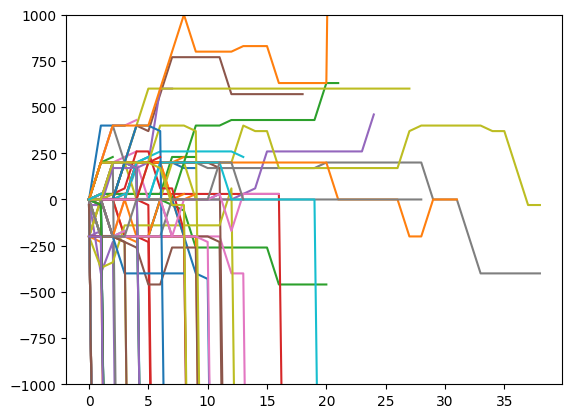

In [14]:
plt.figure()
for res in results:
    plt.plot(res[-1][::2])
    
plt.ylim([-1000, 1000])
plt.show()